In [14]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns, sklearn
from statsmodels.stats.stattools import durbin_watson as dw
import statsmodels.api as sm
import pylab
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats,special
warnings.filterwarnings('ignore')  # don't print out warnings

# figures inline in notebook
%matplotlib inline

In [2]:
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [4]:
#Multiple linear regression model (all existing features using)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

regressor_OLS1 = sm.OLS(y_train, X_train).fit()
regressor_OLS1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              1240.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        19:29:30   Log-Likelihood:                         -65634.
No. Observations:               15300   AIC:                                  1.314e+05
Df Residuals:                   15219   BIC:                                  1.320e+05
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.7964      0.893     -4.251      0.000      -5.547      -2.046
x2             0.8881      0.098      9.035      0.000       0.695       1.081
x3            -0.9599      0.123     -7.832      0.000      -1.200      -0.720
x4            -0.5582      0.097     -5.730      0.000      -0.749      -0.367
x5             0.6937      0.116      5.961      0.000       0.466       0.922
x6           -29.3835      5.435     -5.407      0.000     -40.036     -18.731
x7             2.4118      4.350      0.554      0.579      -6.114      10.938
x8             0.1984      0.020     10.163      0.000       0.160       0.237
x9             0.0176      0.026      0.669      0.504      -0.034       0.069
x10           -0.5426      0.074     -7.297      0.000      -0.688      -0.397
x11            0.1185      0.065      1.830      0.067      -0.008       0.245
x12            0.1702      0.076      2.248      0.025       0.022       0.319
x13           -0.2587      0.091     -2.844      0.004      -0.437      -0.080
x14           -0.1752      0.074     -2.352      0.019      -0.321      -0.029
x15            0.2762      0.090      3.064      0.002       0.100       0.453
x16         -118.6973     23.851     -4.977      0.000    -165.449     -71.946
x17           46.5535      5.754      8.091      0.000      35.275      57.832
x18            0.0694      0.008      9.105      0.000       0.054       0.084
x19            0.0231      0.004      5.415      0.000       0.015       0.032
x20           -0.2087      0.027     -7.856      0.000      -0.261      -0.157
x21           -0.0040      0.024     -0.165      0.869      -0.051       0.043
x22           -0.5726      0.215     -2.669      0.008      -0.993      -0.152
x23            3.3827      0.289     11.704      0.000       2.816       3.949
x24            0.1882      0.215      0.877      0.381      -0.233       0.609
x25           -2.9990      0.283    -10.614      0.000      -3.553      -2.445
x26           77.4361     20.728      3.736      0.000      36.807     118.066
x27           48.0773      6.357      7.563      0.000      35.618      60.537
x28            0.2161      0.026      8.242      0.000       0.165       0.268
x29           -0.0745      0.019     -3.938      0.000      -0.112      -0.037
x30           -0.3651      0.117     -3.114      0.002      -0.595      -0.135
x31           -0.3767      0.106     -3.556      0.000      -0.584      -0.169
x32           -0.0045      0.001     -7.649      0.000      -0.006      -0.003
x33           -0.0002      0.001     -0.316      0.752      -0.002       0.001
x34            0.0012      0.001      2.153      0.031       0.000       0.002
x35            0.0025      0.001      3.542      0.000       

In [5]:
# Feature selection using Backward Elimination method
def backwardelimination(x, y, sl):
    numVars = len(x[0])
    for i in range(0,numVars):
        regressor_OLS2 = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS2.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0,numVars - i):
                if(regressor_OLS2.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    break
        else:
            break
    return x

SL = 0.05
X_modified = backwardelimination(X, y, SL)

In [6]:
#Multiple linear regression model (using 70 features which were selected using Backward Elimination method)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_modified, y, test_size = 0.1, random_state = 0)

regressor_OLS_BE = sm.OLS(y_train_1, X_train_1).fit()
regressor_OLS_BE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              1522.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        19:29:31   Log-Likelihood:                         -65641.
No. Observations:               15300   AIC:                                  1.314e+05
Df Residuals:                   15234   BIC:                                  1.319e+05
Df Model:                          66                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.0931      0.861     -4.757      0.000      -5.780      -2.406
x2             0.7850      0.071     11.021      0.000       0.645       0.925
x3            -0.7885      0.062    -12.810      0.000      -0.909      -0.668
x4            -0.4585      0.076     -6.064      0.000      -0.607      -0.310
x5             0.5300      0.066      8.018      0.000       0.400       0.660
x6           -27.5441      4.794     -5.745      0.000     -36.942     -18.147
x7             0.1951      0.019     10.234      0.000       0.158       0.233
x8            -0.4414      0.052     -8.512      0.000      -0.543      -0.340
x9             0.1561      0.051      3.048      0.002       0.056       0.257
x10           -0.2320      0.042     -5.553      0.000      -0.314      -0.150
x11           -0.1637      0.051     -3.239      0.001      -0.263      -0.065
x12            0.2521      0.042      6.027      0.000       0.170       0.334
x13         -106.9566     21.163     -5.054      0.000    -148.438     -65.475
x14           46.4190      4.800      9.671      0.000      37.011      55.827
x15            0.0692      0.007      9.248      0.000       0.055       0.084
x16            0.0214      0.004      5.812      0.000       0.014       0.029
x17           -0.2096      0.019    -11.027      0.000      -0.247      -0.172
x18           -0.3944      0.031    -12.676      0.000      -0.455      -0.333
x19            3.1488      0.184     17.130      0.000       2.788       3.509
x20           -2.7520      0.173    -15.895      0.000      -3.091      -2.413
x21           66.6195     19.288      3.454      0.001      28.812     104.427
x22           51.1727      4.463     11.467      0.000      42.425      59.920
x23            0.2220      0.026      8.705      0.000       0.172       0.272
x24           -0.0767      0.014     -5.324      0.000      -0.105      -0.048
x25           -0.4476      0.084     -5.344      0.000      -0.612      -0.283
x26           -0.3058      0.074     -4.134      0.000      -0.451      -0.161
x27           -0.0047      0.000    -11.529      0.000      -0.005      -0.004
x28            0.0012      0.000      2.924      0.003       0.000       0.002
x29            0.0025      0.000      8.143      0.000       0.002       0.003
x30           11.3174      3.743      3.024      0.003       3.980      18.654
x31          -15.6266      2.438     -6.409      0.000     -20.406     -10.848
x32           -0.0017      0.000     -6.814      0.000      -0.002      -0.001
x33            0.0058      0.001      7.656      0.000       0.004       0.007
x34           -0.0010      0.000     -2.178      0.029      -0.002   -9.74e-05
x35           -0.1215      0.053     -2.292      0.022      -

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

regressor1 = LinearRegression()
regressor1.fit(X_train_1, y_train_1)

LinearRegression()

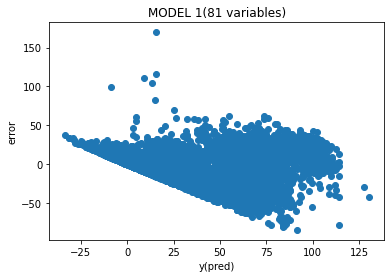

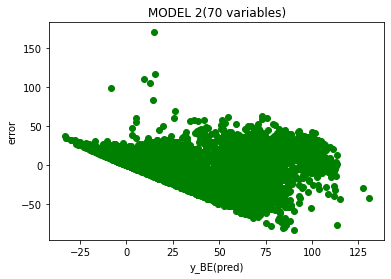

In [8]:
#To check the homoscedasticity a graph is plotted with the residuals and the predicted values of training Y. 

y_train_pred = regressor.predict(X_train)

e = (y_train - y_train_pred)
plt.xlabel('y(pred)')
plt.ylabel('error')
plt.title("MODEL 1(81 variables)")
plt.scatter(y_train_pred, e)

plt.figure()

############################################################################

y_train_pred_1 = regressor1.predict(X_train_1)

e_1 = y_train_1 - y_train_pred_1
plt.xlabel('y_BE(pred)')
plt.ylabel('error')
plt.title("MODEL 2(70 variables)")
plt.scatter(y_train_pred_1, e_1, color='g')

#The graphs has funnel shape which concludes the heteroscedasticity

In [9]:
#Performing Darwin - Watson test to check Residuals corelation.
DW = dw(e)
DW_BE = dw(e_1)
print("DW(Model 1) = %f nearly 2 => residuals(errors) are uncorrelated"%(DW))
print("DW(Model 2) = %f nearly 2 => residuals(errors) are uncorrelated"%(DW_BE))
#DW value for first and second model is 1.982 and 1.979 respectively which are nearly equal to 2. 
#It implies that residuals are uncorrelated.

DW(Model 1) = 2.012363 nearly 2 => residuals(errors) are uncorrelated
DW(Model 2) = 2.013468 nearly 2 => residuals(errors) are uncorrelated


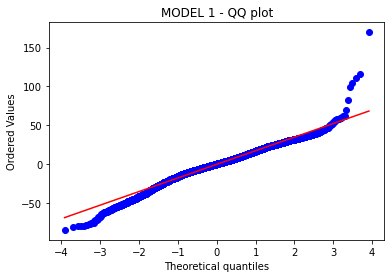

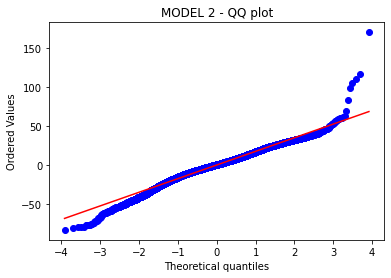

In [10]:
#Normality test using Q-Q plot.
stats.probplot(e, dist="norm", plot=pylab)
pylab.title("MODEL 1 - QQ plot")
pylab.show()

pylab.figure()

stats.probplot(e_1, dist="norm", plot=pylab)
pylab.title("MODEL 2 - QQ plot")
pylab.show()
#The graph is linear without large deviation, thus can be concluded that the residuals are normally distributed.

In [11]:
#To overcome heteroscedasticity priblem, we have to transform the Y to another domain 
#(Let's try to use BOX-COX method to transform y's).
boxcox_y, lmbda, CI = stats.boxcox(y, alpha=0.05)


X_train1_box, X_test1_box, y_train1_box, y_test1_box = train_test_split(X_modified, boxcox_y, test_size = 0.1, random_state = 0)

X_train_box, X_test_box, y_train_box, y_test_box = train_test_split(X, boxcox_y, test_size = 0.1, random_state = 0)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              2643.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        19:29:32   Log-Likelihood:                         -26323.
No. Observations:               15300   AIC:                                  5.281e+04
Df Residuals:                   15219   BIC:                                  5.343e+04
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

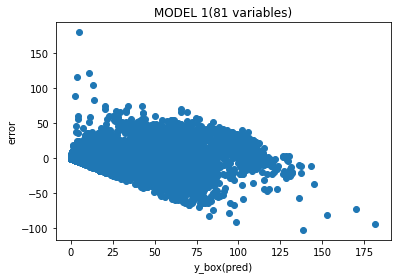

In [12]:
#Multiple linear regression model creation (using transfirmed dataset with all features)
regressor_box = LinearRegression()
regressor_box.fit(X_train_box, y_train_box)

trans_y_train_box = special.inv_boxcox(y_train_box, lmbda)
trans_y_test_box = special.inv_boxcox(y_test_box, lmbda)

y_train_box_pred = special.inv_boxcox(regressor_box.predict(X_train_box), lmbda)

e = trans_y_train_box - y_train_box_pred
plt.xlabel('y_box(pred)')
plt.ylabel('error')
plt.title("MODEL 1(81 variables)")
plt.scatter(y_train_box_pred, e)

regressor_OLS_box = sm.OLS(y_train_box, X_train_box).fit()
print(regressor_OLS_box.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              3184.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        19:29:32   Log-Likelihood:                         -26462.
No. Observations:               15300   AIC:                                  5.306e+04
Df Residuals:                   15234   BIC:                                  5.356e+04
Df Model:                          66                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

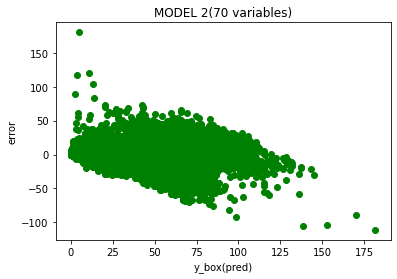

In [13]:
#Multiple linear regression model creation (using transformed dataset which contains selected 70 features) 
regressor_box_1 = LinearRegression()
regressor_box_1.fit(X_train1_box, y_train1_box)

trans_y_train_box_1 = special.inv_boxcox(y_train1_box, lmbda)
trans_y_test_box_1 = special.inv_boxcox(y_test1_box, lmbda)

y_train_box_pred_1 = special.inv_boxcox(regressor_box_1.predict(X_train1_box), lmbda)

e = trans_y_train_box_1 - y_train_box_pred_1
plt.xlabel('y_box(pred)')
plt.ylabel('error')
plt.title("MODEL 2(70 variables)")
plt.scatter(y_train_box_pred, e,color = 'g')

regressor_OLS_box_1 = sm.OLS(y_train1_box, X_train1_box).fit()
print(regressor_OLS_box_1.summary())